In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base = pd.read_csv('../../Data/BaseData.csv')

In [3]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 298)

In [6]:
X.shape[1]

298

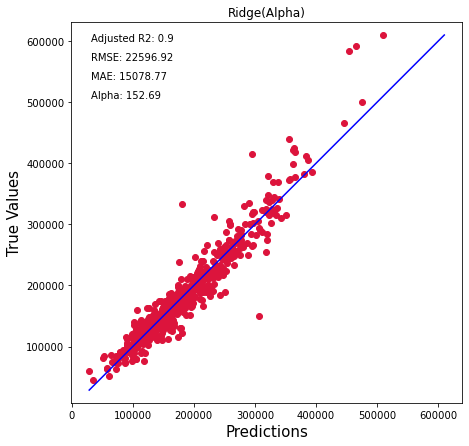

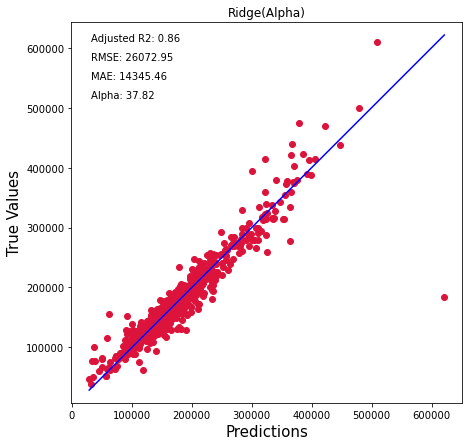

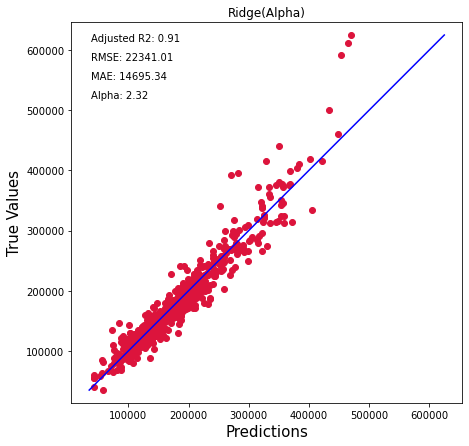

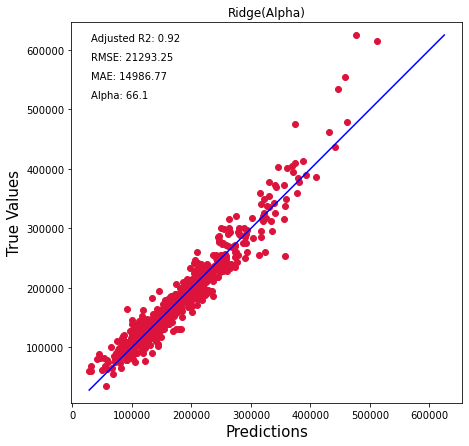

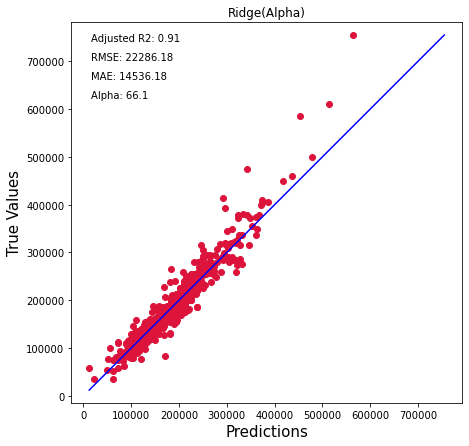

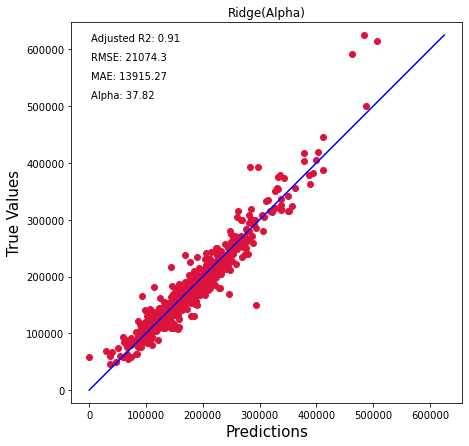

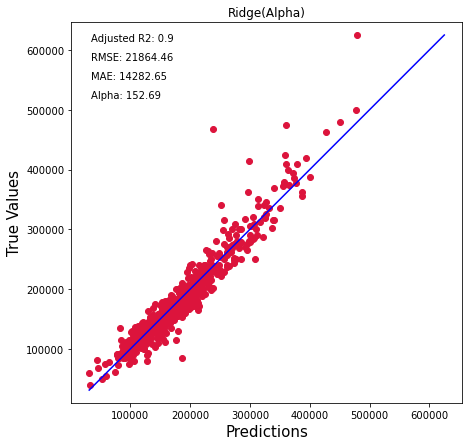

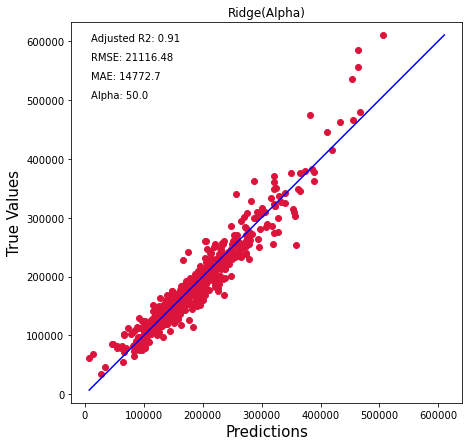

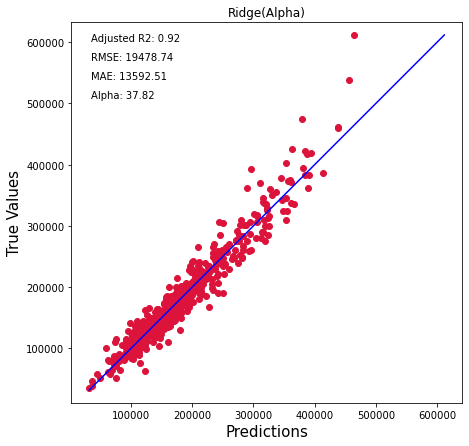

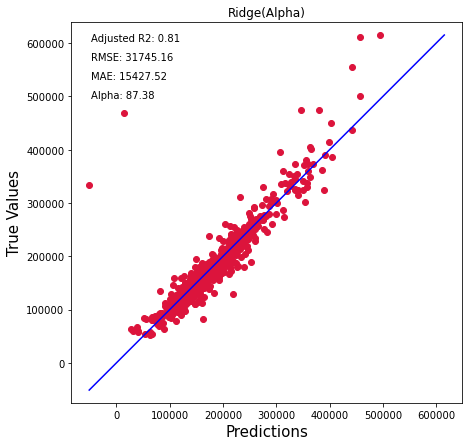

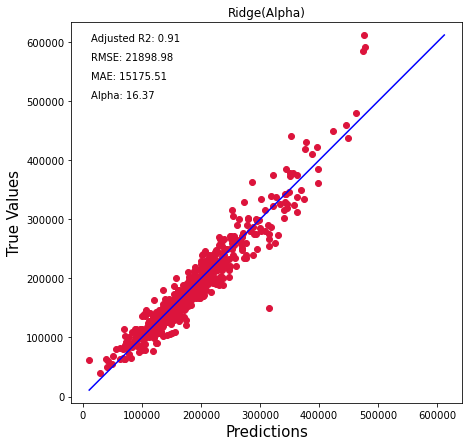

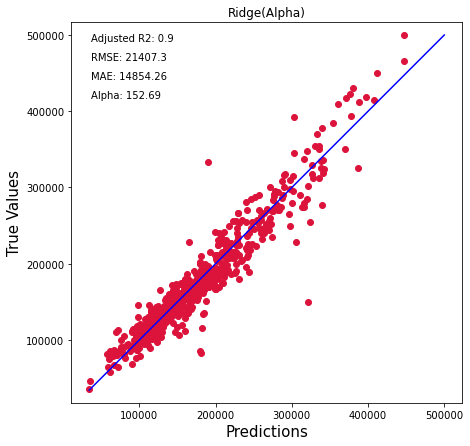

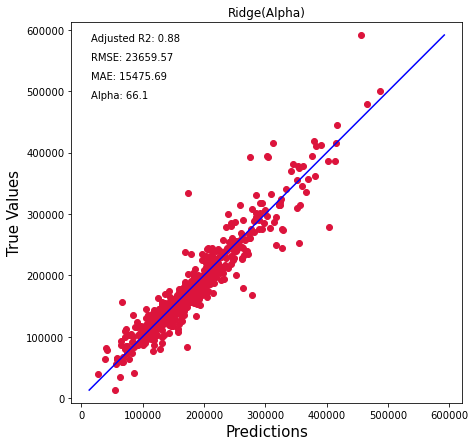

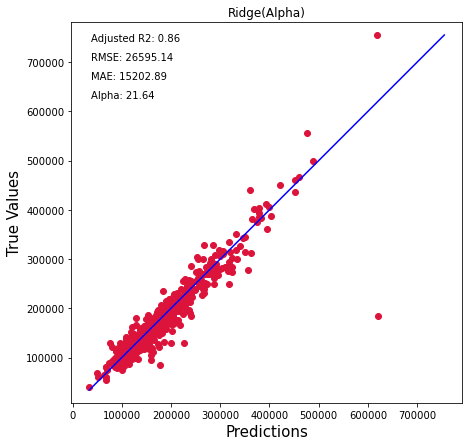

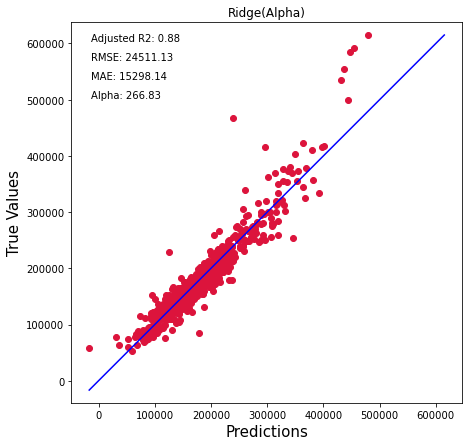

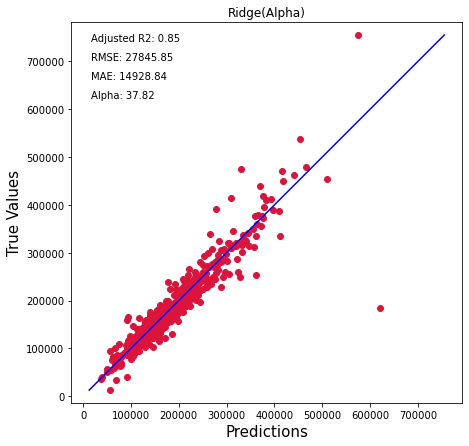

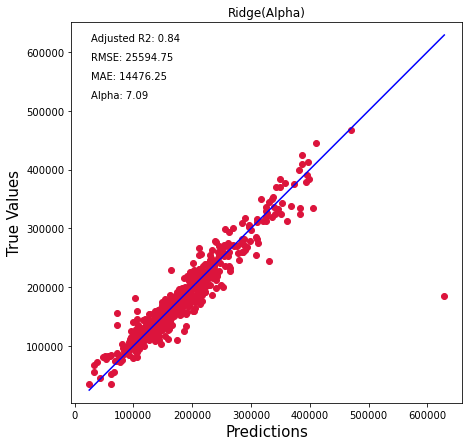

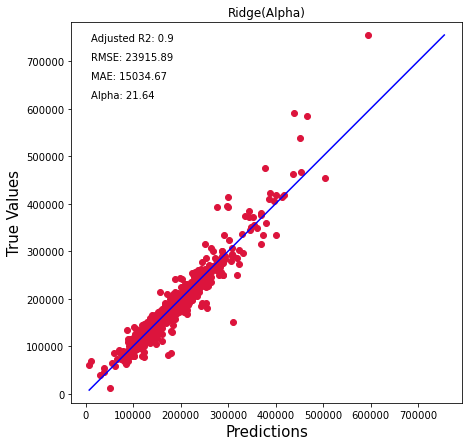

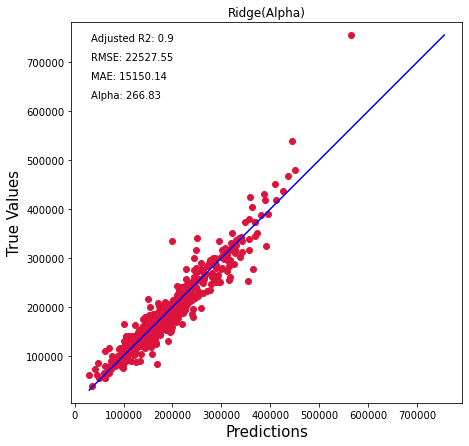

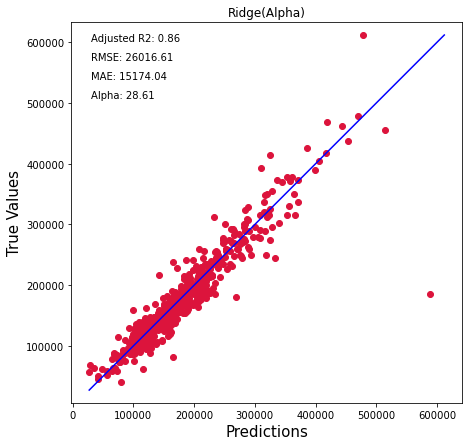

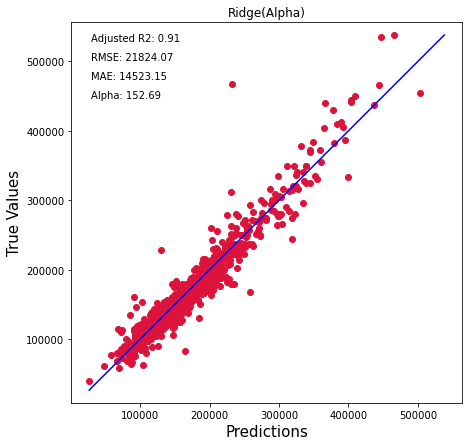

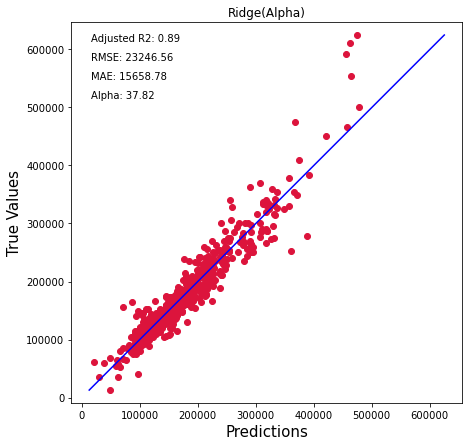

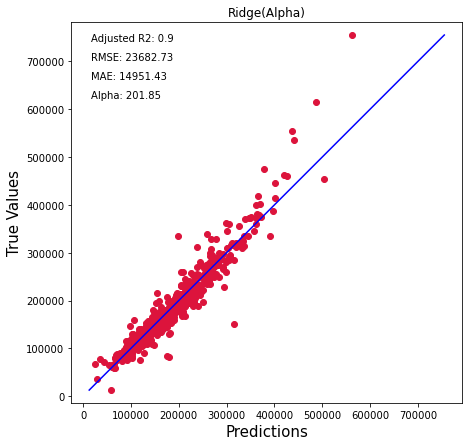

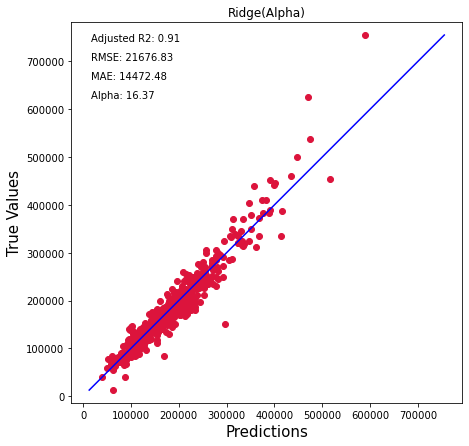

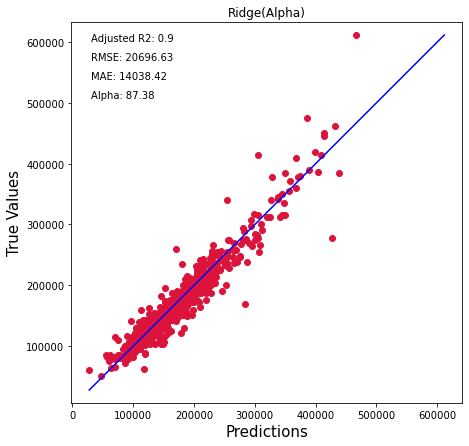

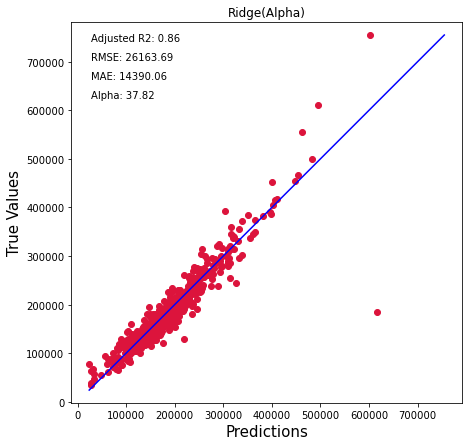

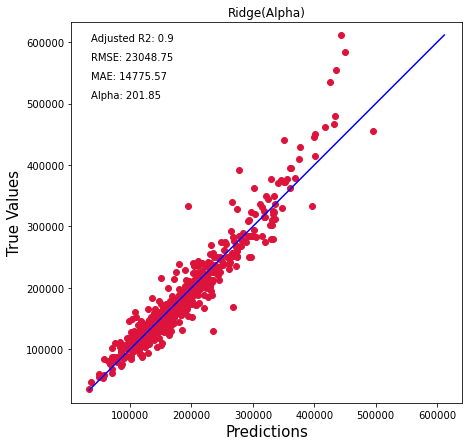

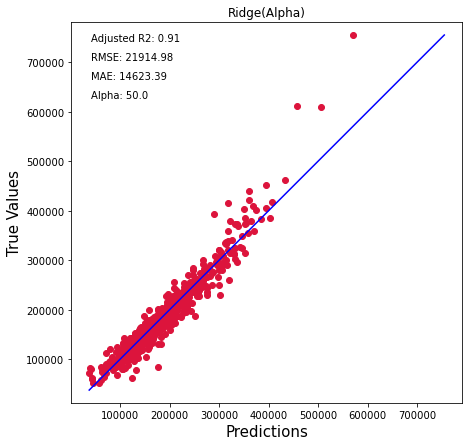

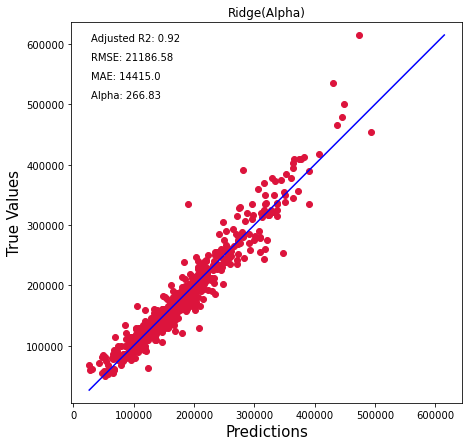

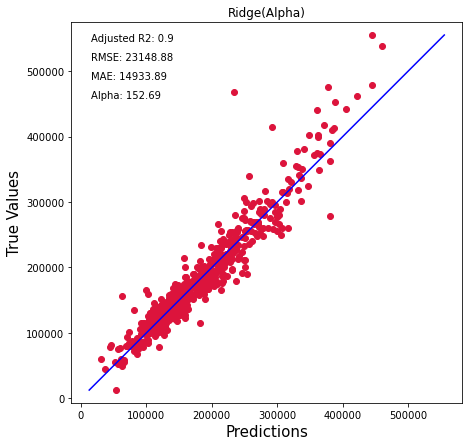

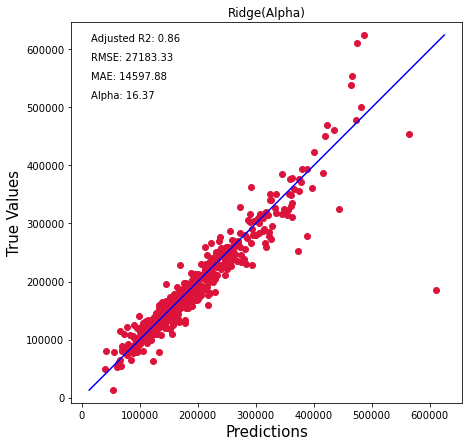

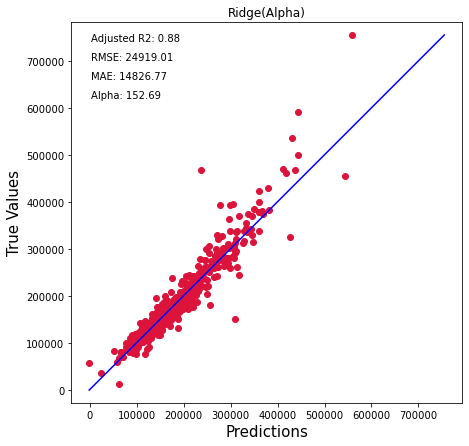

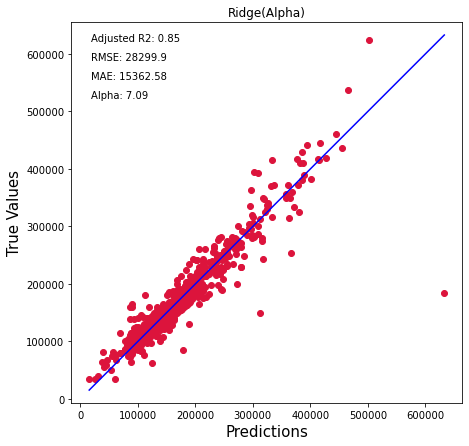

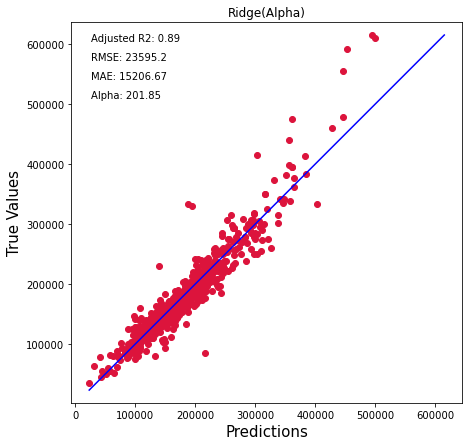

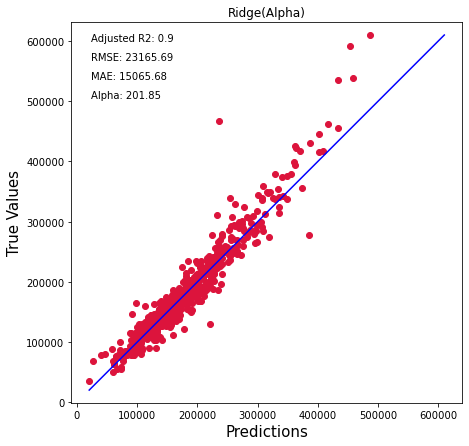

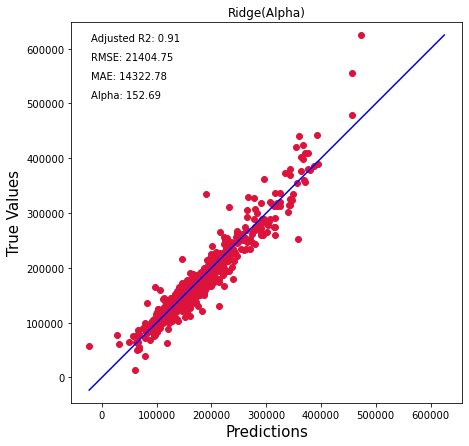

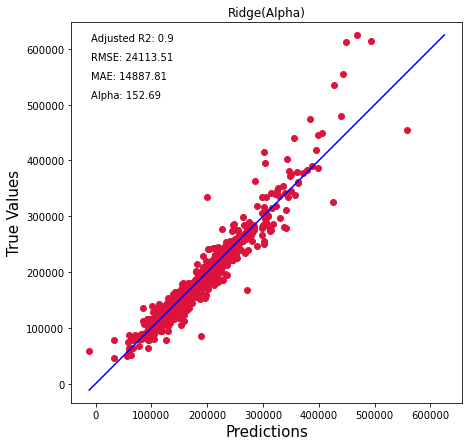

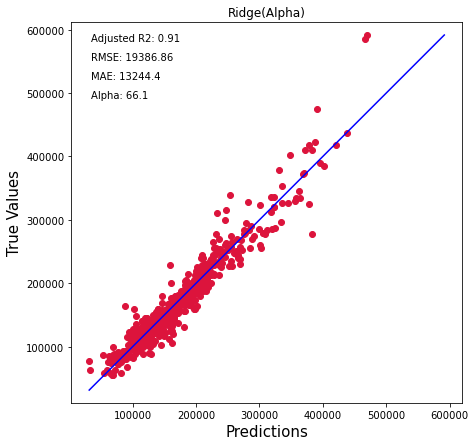

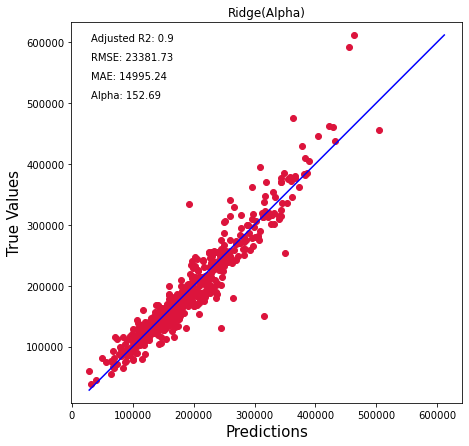

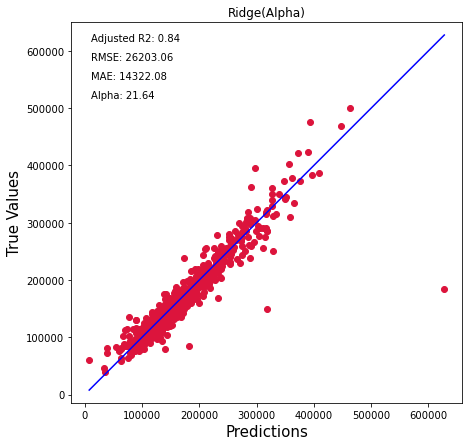

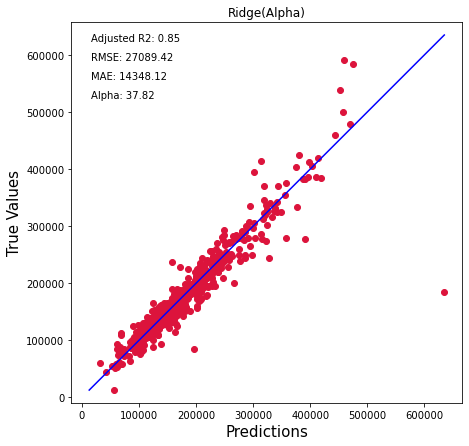

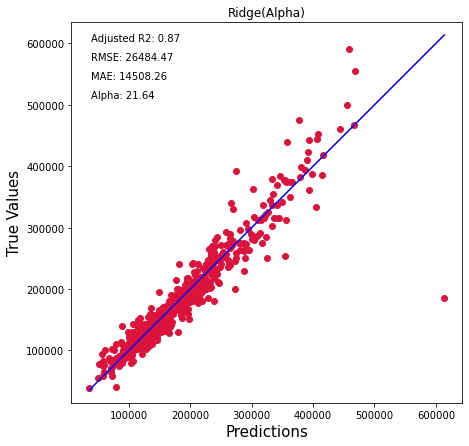

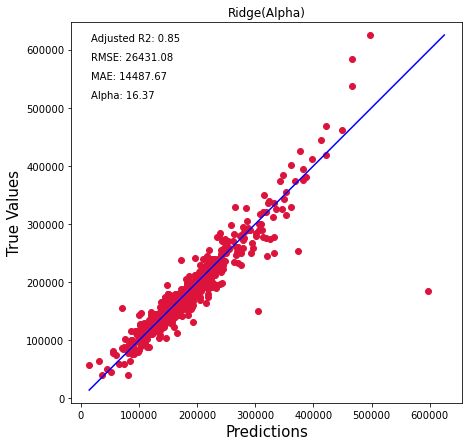

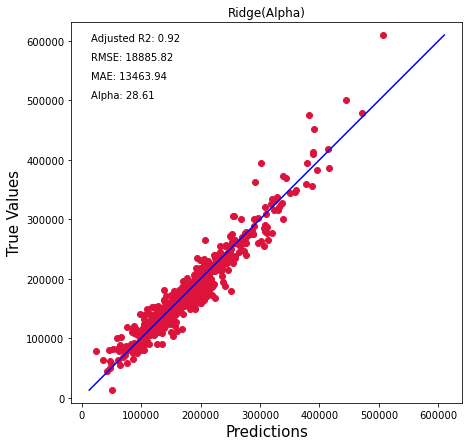

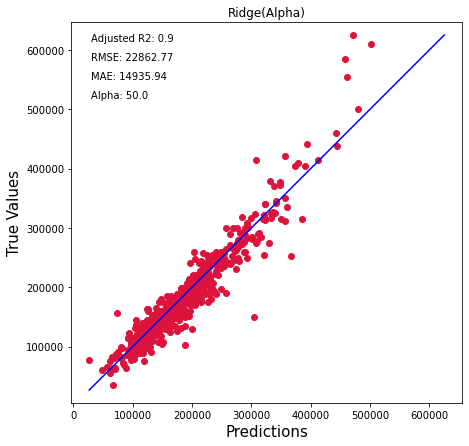

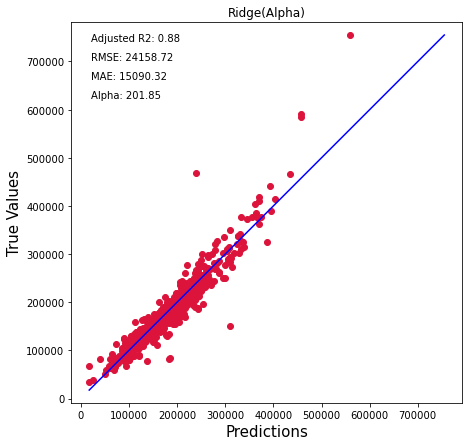

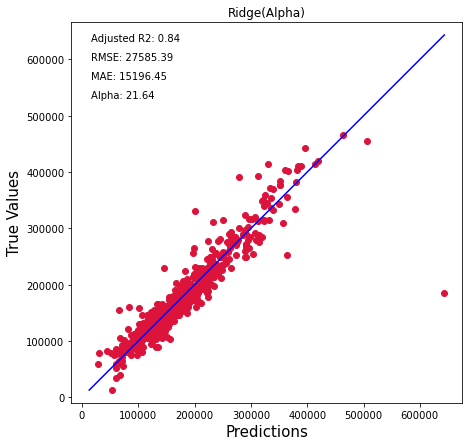

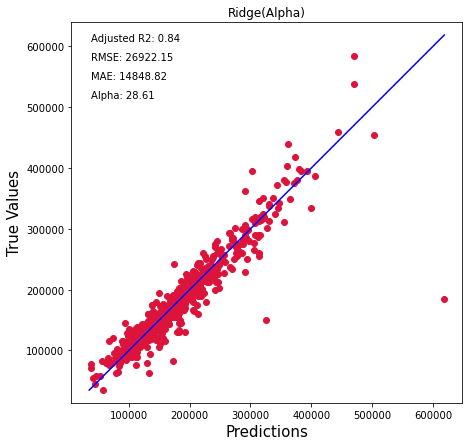

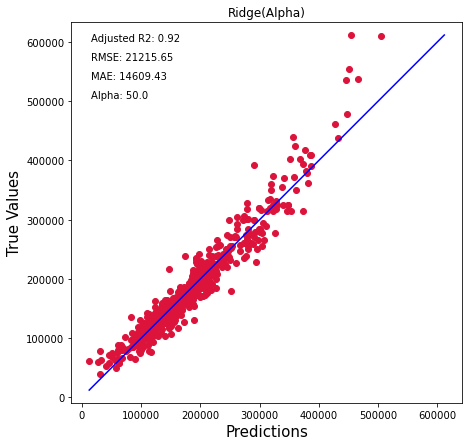

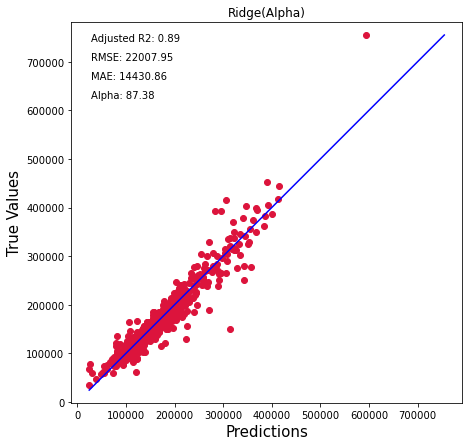

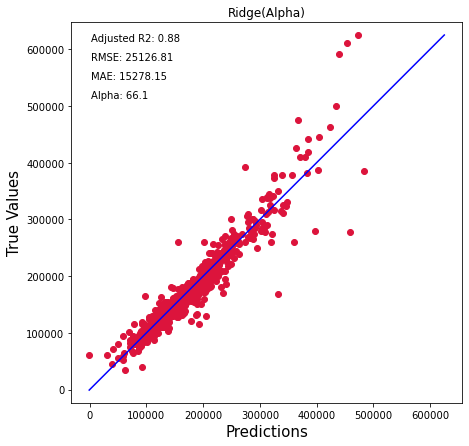

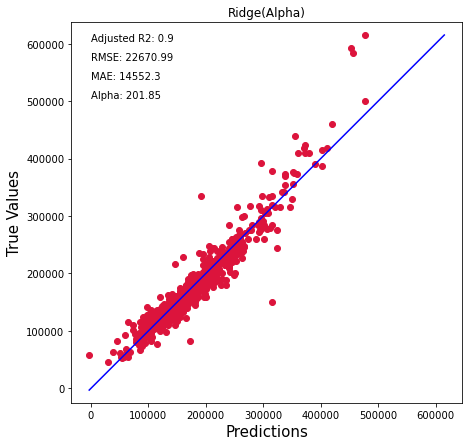

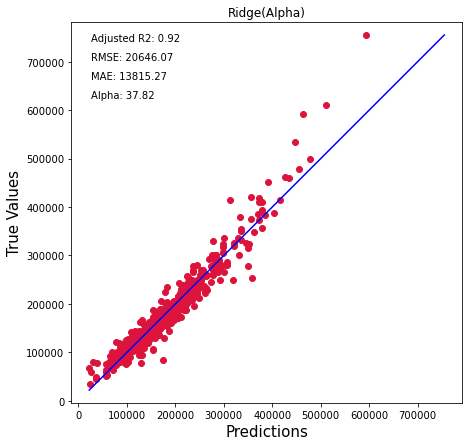

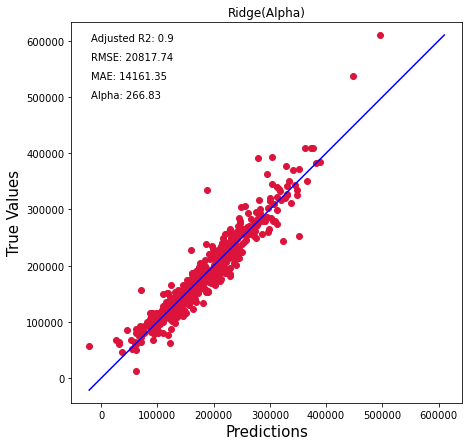

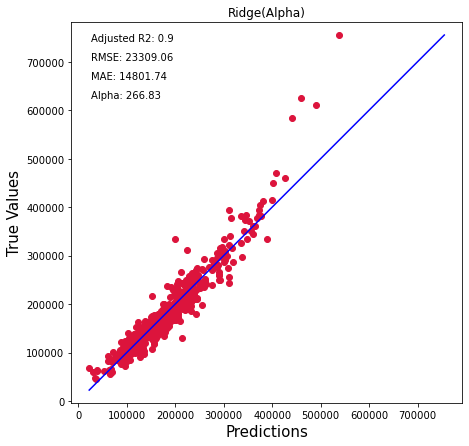

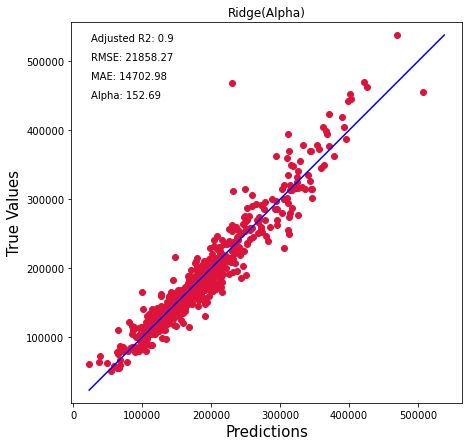

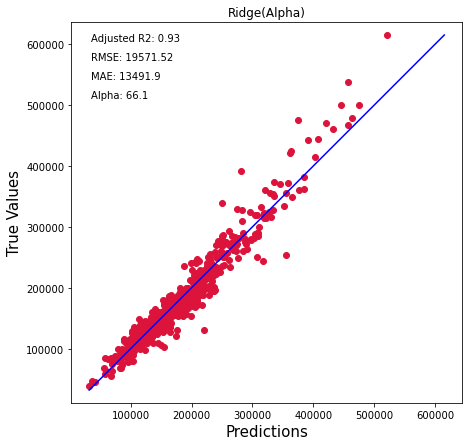

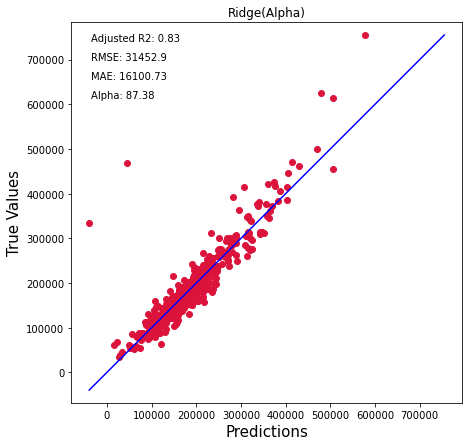

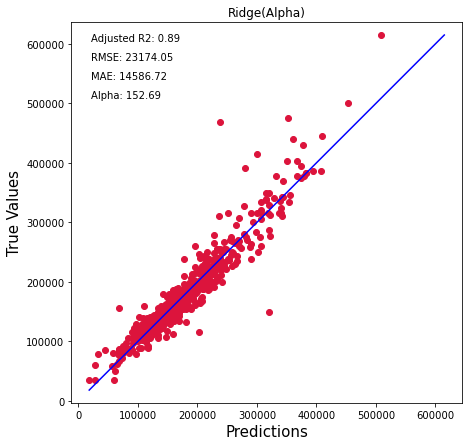

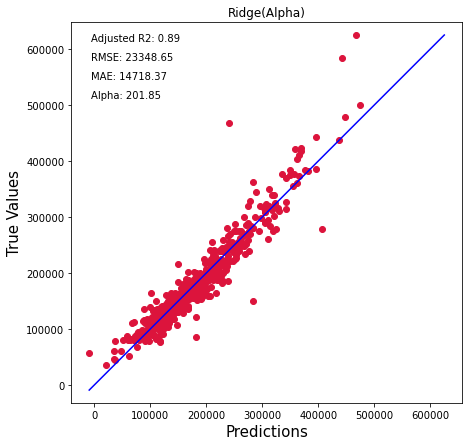

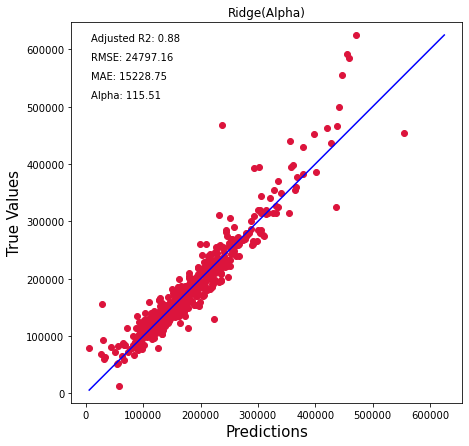

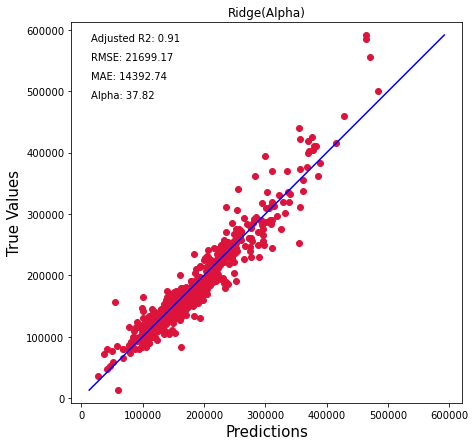

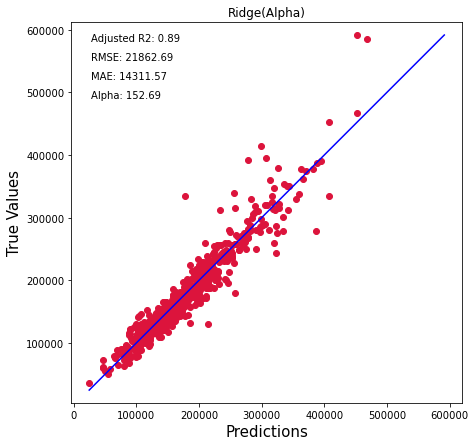

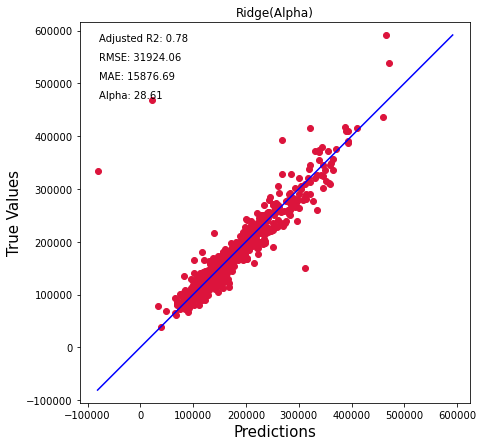

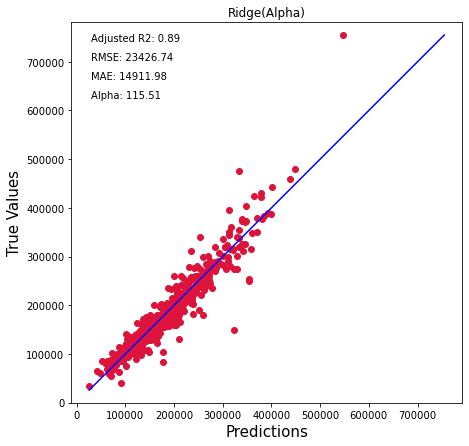

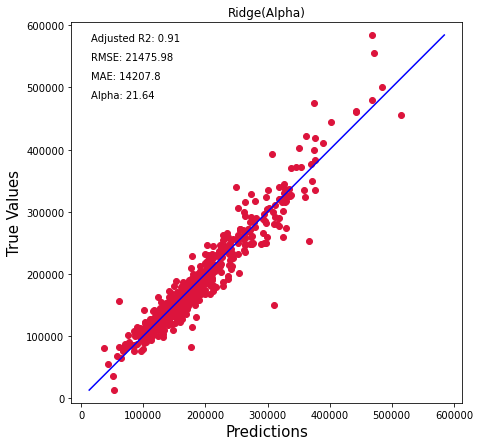

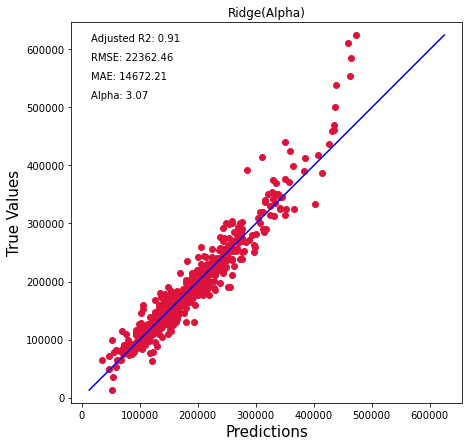

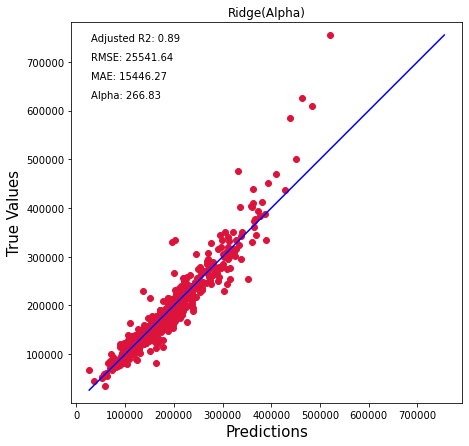

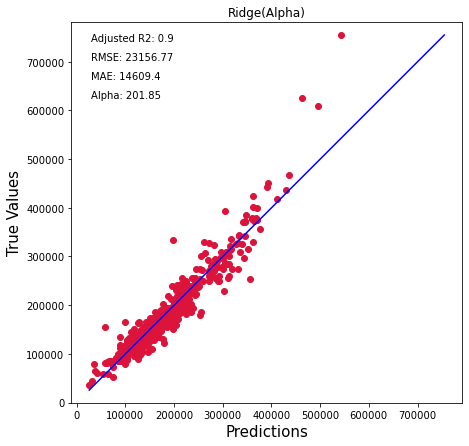

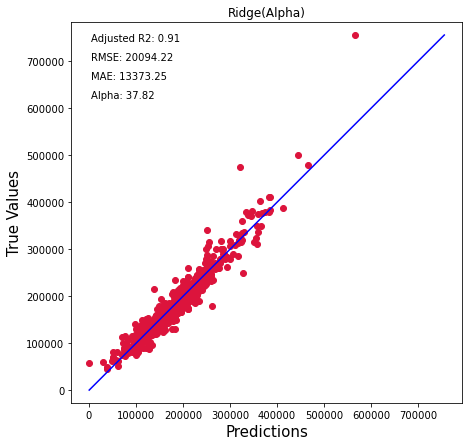

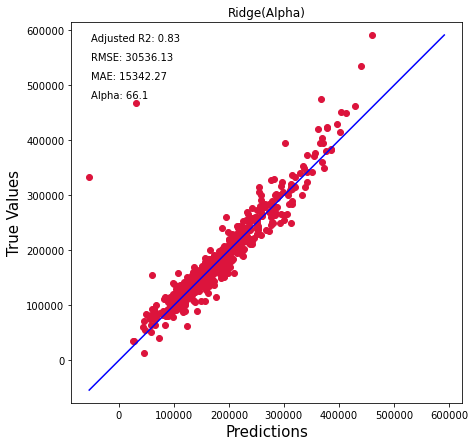

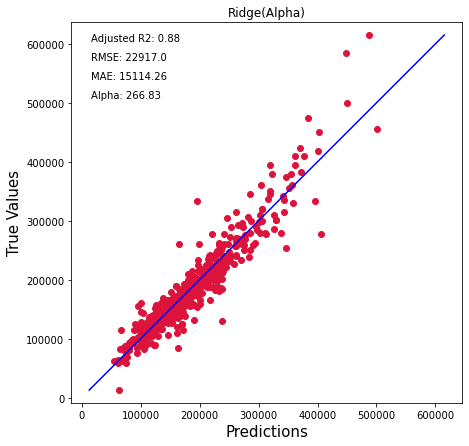

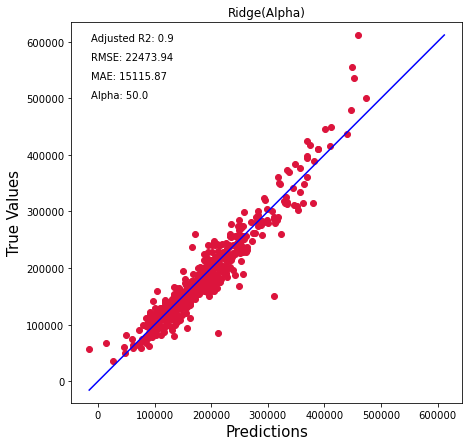

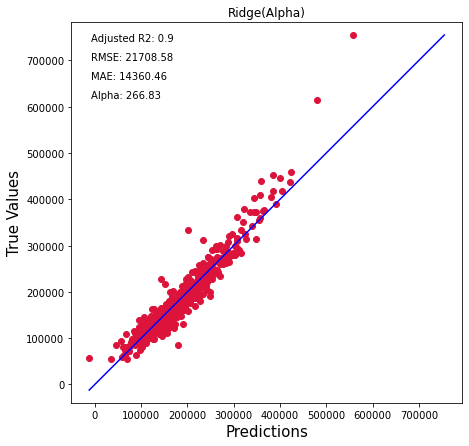

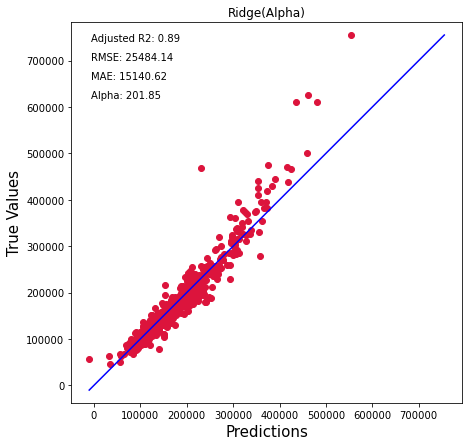

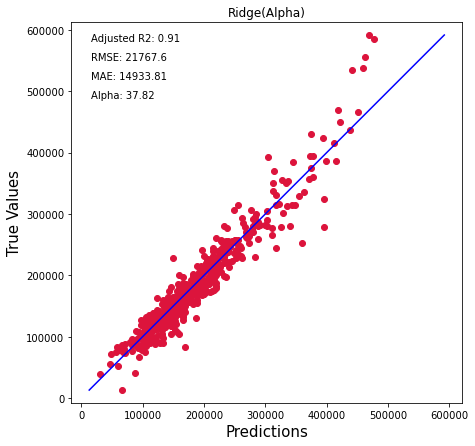

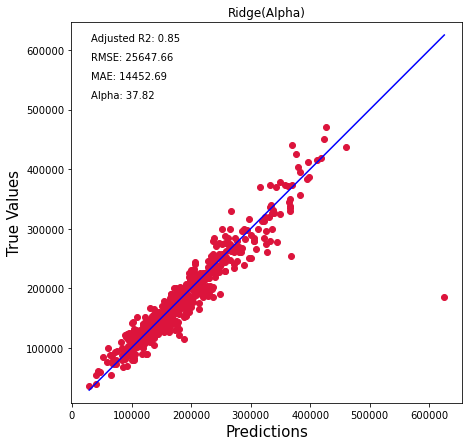

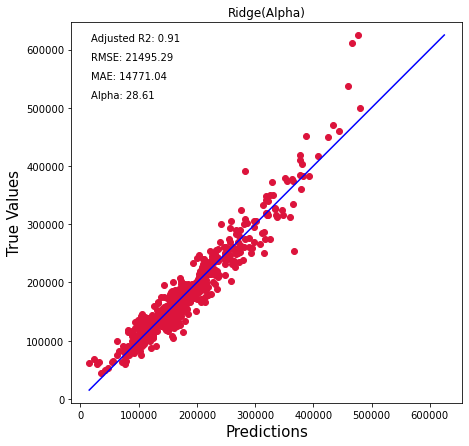

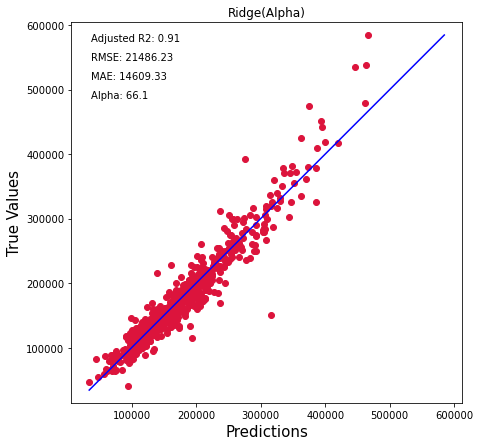

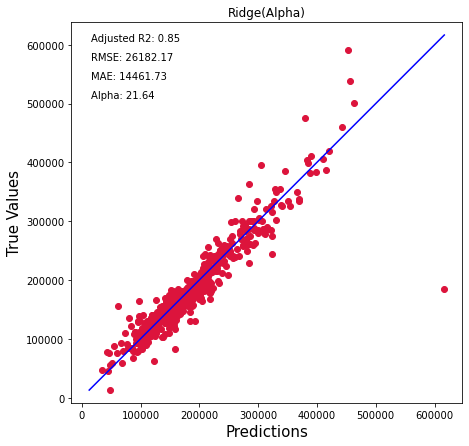

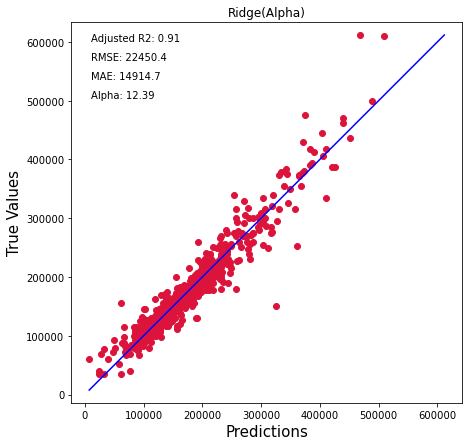

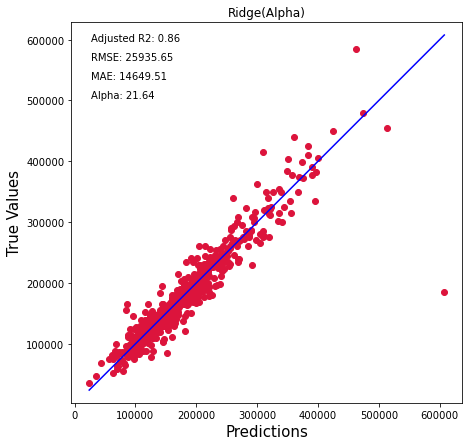

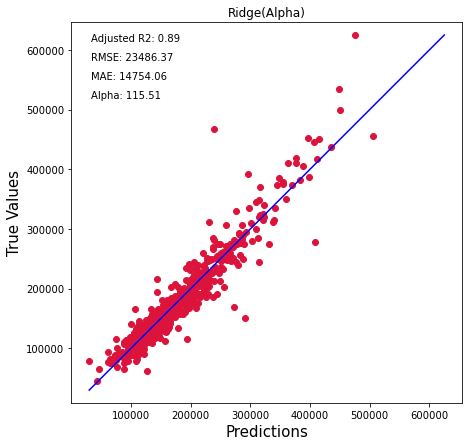

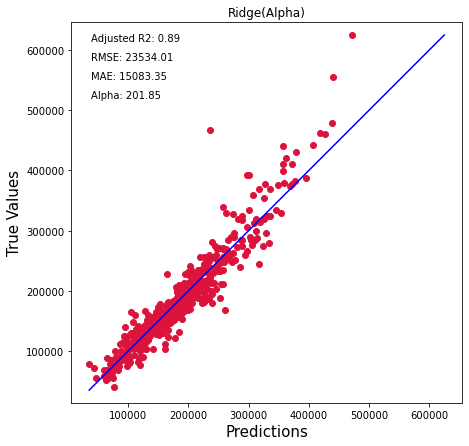

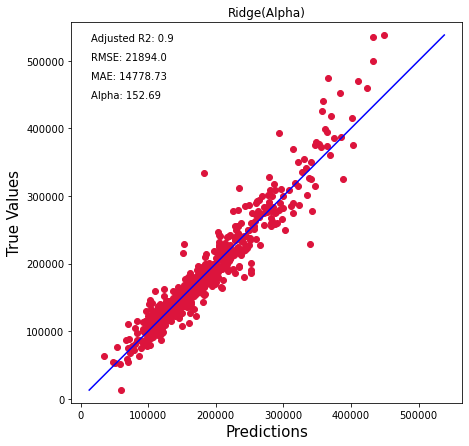

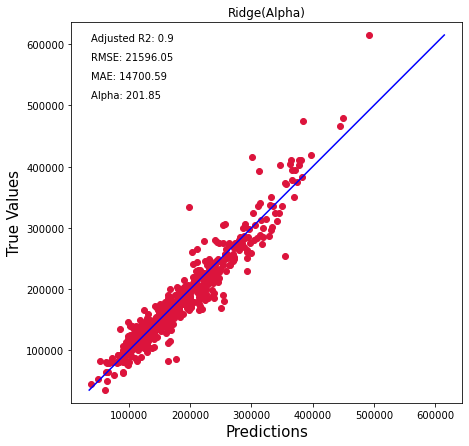

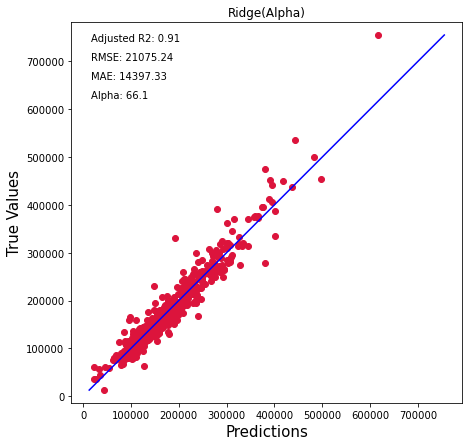

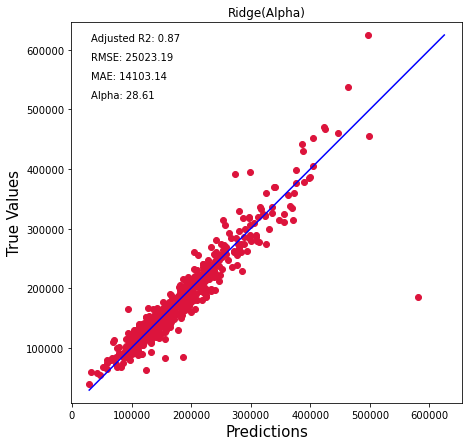

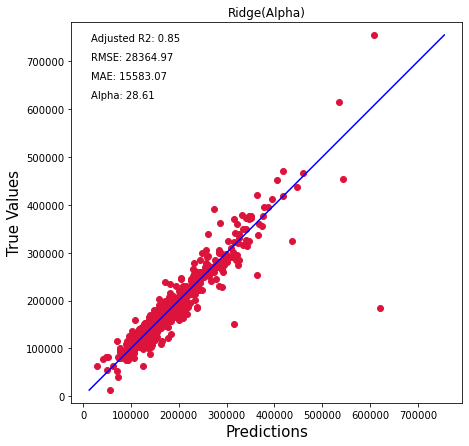

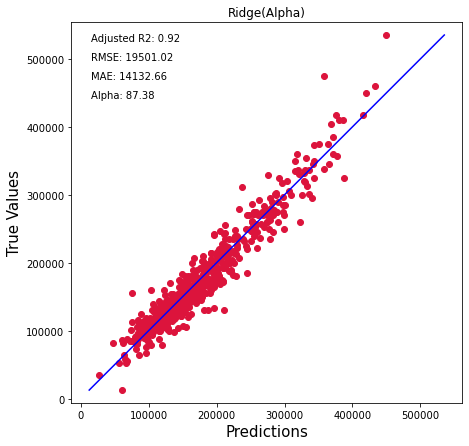

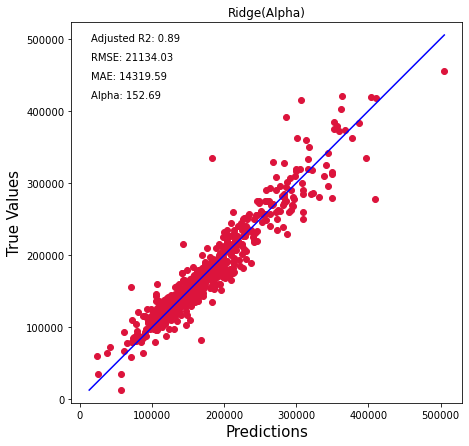

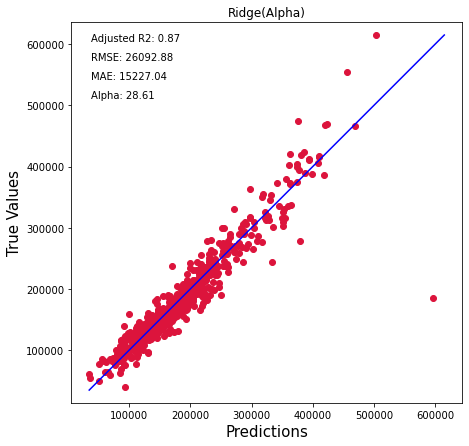

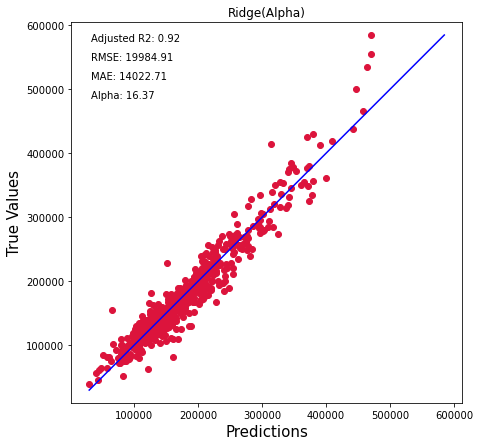

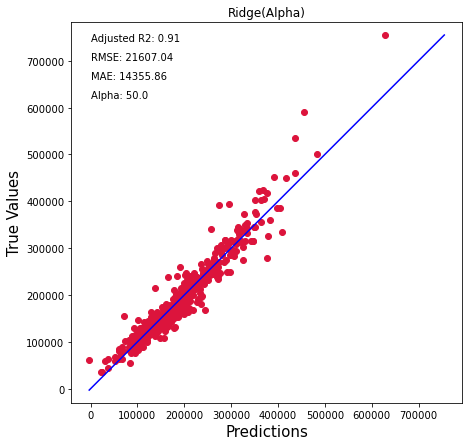

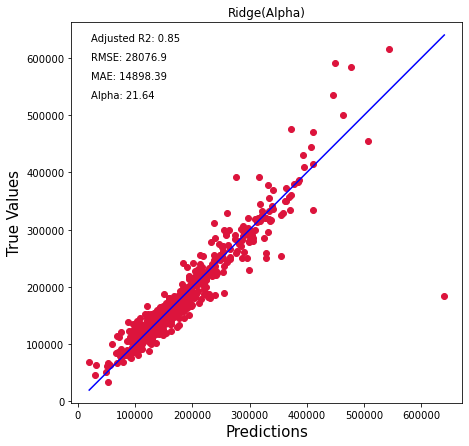

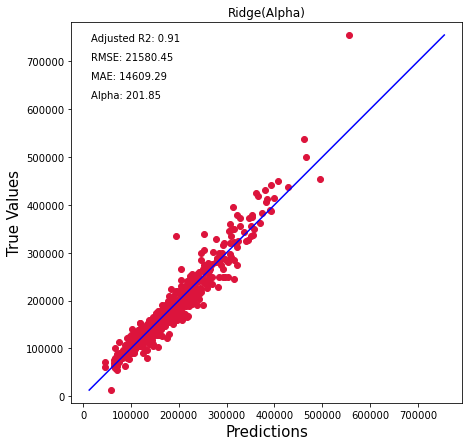

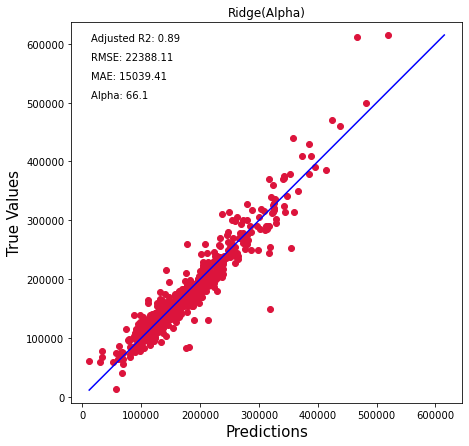

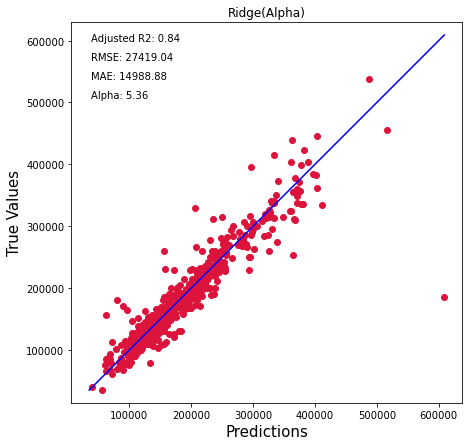

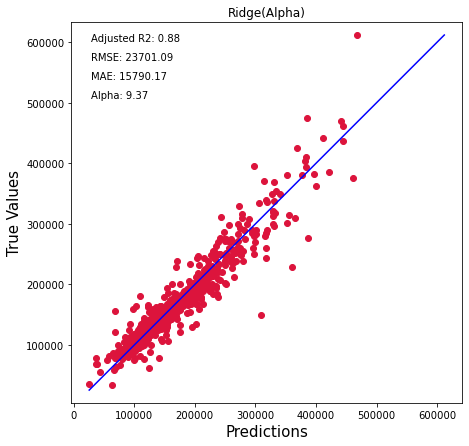

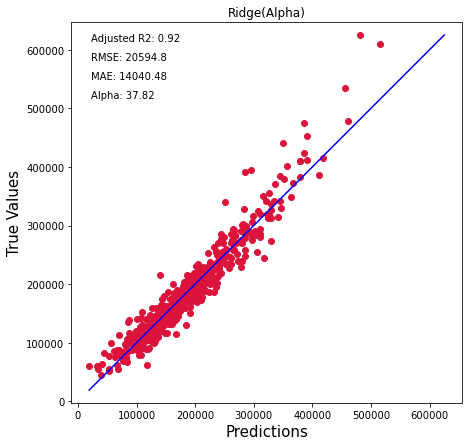

In [12]:
Scores = []
AdjR2 = []

Ridge_Alphas = []
alphas = 10**np.linspace(10,-2,100)*0.5

MSE = []
RMSE = []
MAE = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    ridgecv= RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
    ridgecv.fit(X_train_scaled, Y_train)
    
    ridge_best_alpha = Ridge(alpha=round(ridgecv.alpha_,2))
    ridge_best_alpha.fit(X_train_scaled, Y_train)
    Ridge_A_Score = ridge_best_alpha.score(X_test_scaled, Y_test)
    
    pred = ridge_best_alpha.predict(X_test_scaled)
    
    Scores.append(Ridge_A_Score)
    
    Adj_r2 = 1 - (1-Ridge_A_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    
    Ridge_Alphas.append(ridgecv.alpha_)
    
    mse = mean_squared_error(Y_test, pred)
    MSE.append(mse)
    
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE.append(mae)
    
    plt.figure(figsize=(7,7))
    plt.scatter(pred, Y_test, c='crimson')
    
    plt.title('Ridge(Alpha)')
    p1 = max(max(pred), max(Y_test))
    p2 = min(min(pred), min(Y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('True Values', fontsize=15)
    plt.axis('equal')
    plt.annotate('Adjusted R2: ' + str(round(Adj_r2,2)), xy=(0.05, 0.95), xycoords='axes fraction')
    plt.annotate('RMSE: ' + str(round(rmse,2)), xy=(0.05, 0.90), xycoords='axes fraction')
    plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction')
    plt.annotate('Alpha: ' +str(round(ridgecv.alpha_,2)), xy=(0.05, 0.80), xycoords='axes fraction')
    plt.show()
    

In [13]:
combo = pd.DataFrame({'R_Squared': Scores, 'Adjusted_R2': AdjR2, 'Mean Squared Error': MSE,
                      'Root MSE': RMSE, 'Mean Absolute Error': MAE, 'Alpha': Ridge_Alphas})

In [14]:
combo

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error,Alpha
0,0.912098,0.900614,5.106210e+08,22596.924352,15078.772567,152.692775
1,0.879047,0.863245,6.797988e+08,26072.951055,14345.458711,37.823166
2,0.916509,0.905601,4.991208e+08,22341.012281,14695.338712,2.320794
3,0.926232,0.916594,4.534025e+08,21293.249844,14986.772546,66.097057
4,0.917533,0.906759,4.966739e+08,22286.182026,14536.179424,66.097057
5,0.920177,0.909749,4.441260e+08,21074.297556,13915.267558,37.823166
6,0.914760,0.903624,4.780546e+08,21864.459277,14282.651528,152.692775
7,0.917908,0.907183,4.459059e+08,21116.483513,14772.696542,50.000000
8,0.932742,0.923955,3.794213e+08,19478.739601,13592.513649,37.823166
9,0.833246,0.811461,1.007755e+09,31745.155082,15427.520940,87.376420


In [21]:
combo.to_csv('Ridge(Alpha).csv', index=False)

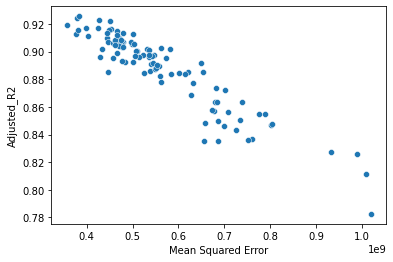

In [15]:
sns.scatterplot(data=combo, x='Mean Squared Error', y='Adjusted_R2'); 

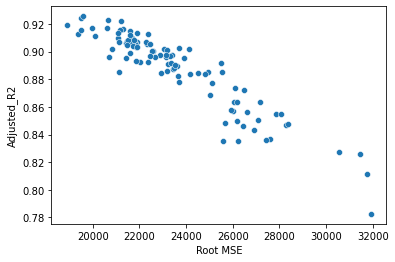

In [16]:
sns.scatterplot(data=combo, x='Root MSE', y='Adjusted_R2'); 

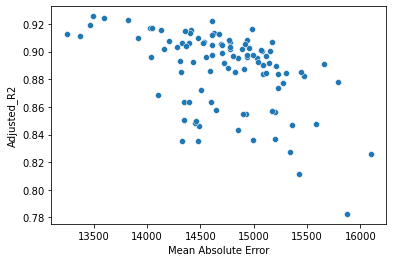

In [17]:
sns.scatterplot(data=combo, x='Mean Absolute Error', y='Adjusted_R2'); 

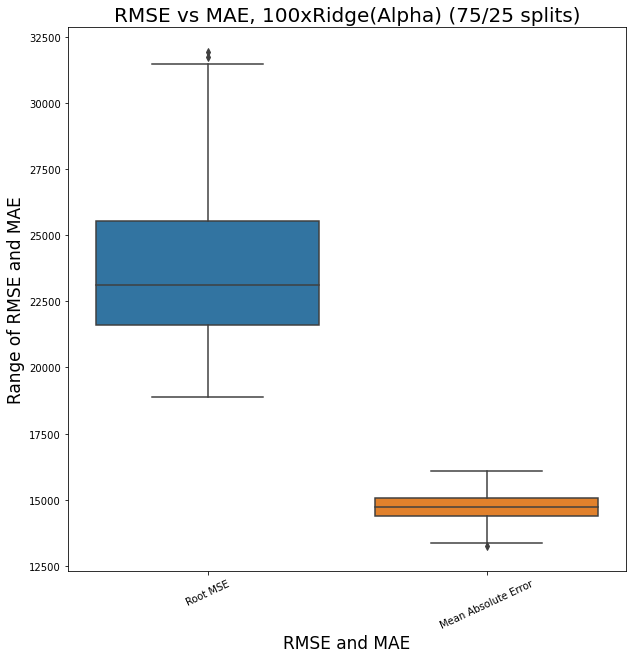

In [18]:
plt.figure(figsize=(10,10))
plt.title('RMSE vs MAE, 100xRidge(Alpha) (75/25 splits)', fontsize=20)
plt.ylabel('Range of RMSE and MAE', fontsize=17)
plt.xlabel('RMSE and MAE', fontsize=17)
sns.boxplot(data=combo[['Root MSE', 'Mean Absolute Error']])
plt.xticks(rotation=25);

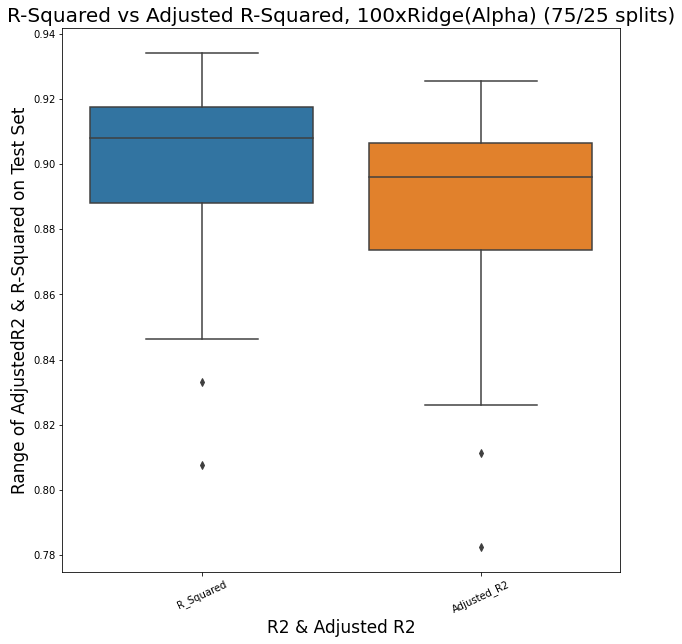

In [19]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xRidge(Alpha) (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('R2 & Adjusted R2', fontsize=17)
sns.boxplot(data=combo[['R_Squared', 'Adjusted_R2']])
plt.xticks(rotation=25);

In [20]:
combo.describe()

,R_Squared,Adjusted_R2,Mean Squared Error,Root MSE,Mean Absolute Error,Alpha
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,0.900141,0.887095,5.642401e+08,23591.842214,14718.687221,94.828942
std,0.024769,0.028005,1.388214e+08,2782.542271,528.874511,81.256908
min,0.807699,0.782576,3.566742e+08,18885.820951,13244.401147,2.320794
25%,0.888149,0.873536,4.667454e+08,21604.290244,14396.178796,28.611838
50%,0.908002,0.895983,5.335578e+08,23098.814773,14736.219702,66.097057
75%,0.917366,0.906570,6.530541e+08,25554.913256,15079.917166,152.692775
max,0.934147,0.925544,1.019145e+09,31924.057705,16100.729747,266.834962
